In [179]:
import pandas as pd
df = pd.read_csv(r'C:\Users\pbeal\OneDrive\Documentos\GitHub\ENS5172_20241\tabelas\dados_trabalho01.csv' , encoding='ISO-8859-1')

df

,Fonte,PM,PM10,"PM2,5",NOX,SO2,CO,VOC
0,Chaminés,45.34,29.25,19.17,104.09,280.37,"3,506.15",6.12
1,Erosão Eólica - Pilhas,1.15,0.57,0.09,-,-,-,-
2,Fugitivas,0.44,1.04,0.18,0.04,1.01,0.55,22.25
3,Máquinas/Equipamentos,0.19,0.19,0.19,3.98,"<0,01",1.4,0.45
4,Navios,3.04,3.04,3.04,26.73,23.3,3.11,2.91
5,Tanques,-,-,-,-,-,-,<0.01
6,Transferências,8.54,2.25,0.37,-,-,-,-
7,Vias,14.96,2.99,0.68,0.36,0.01,0.12,0.06


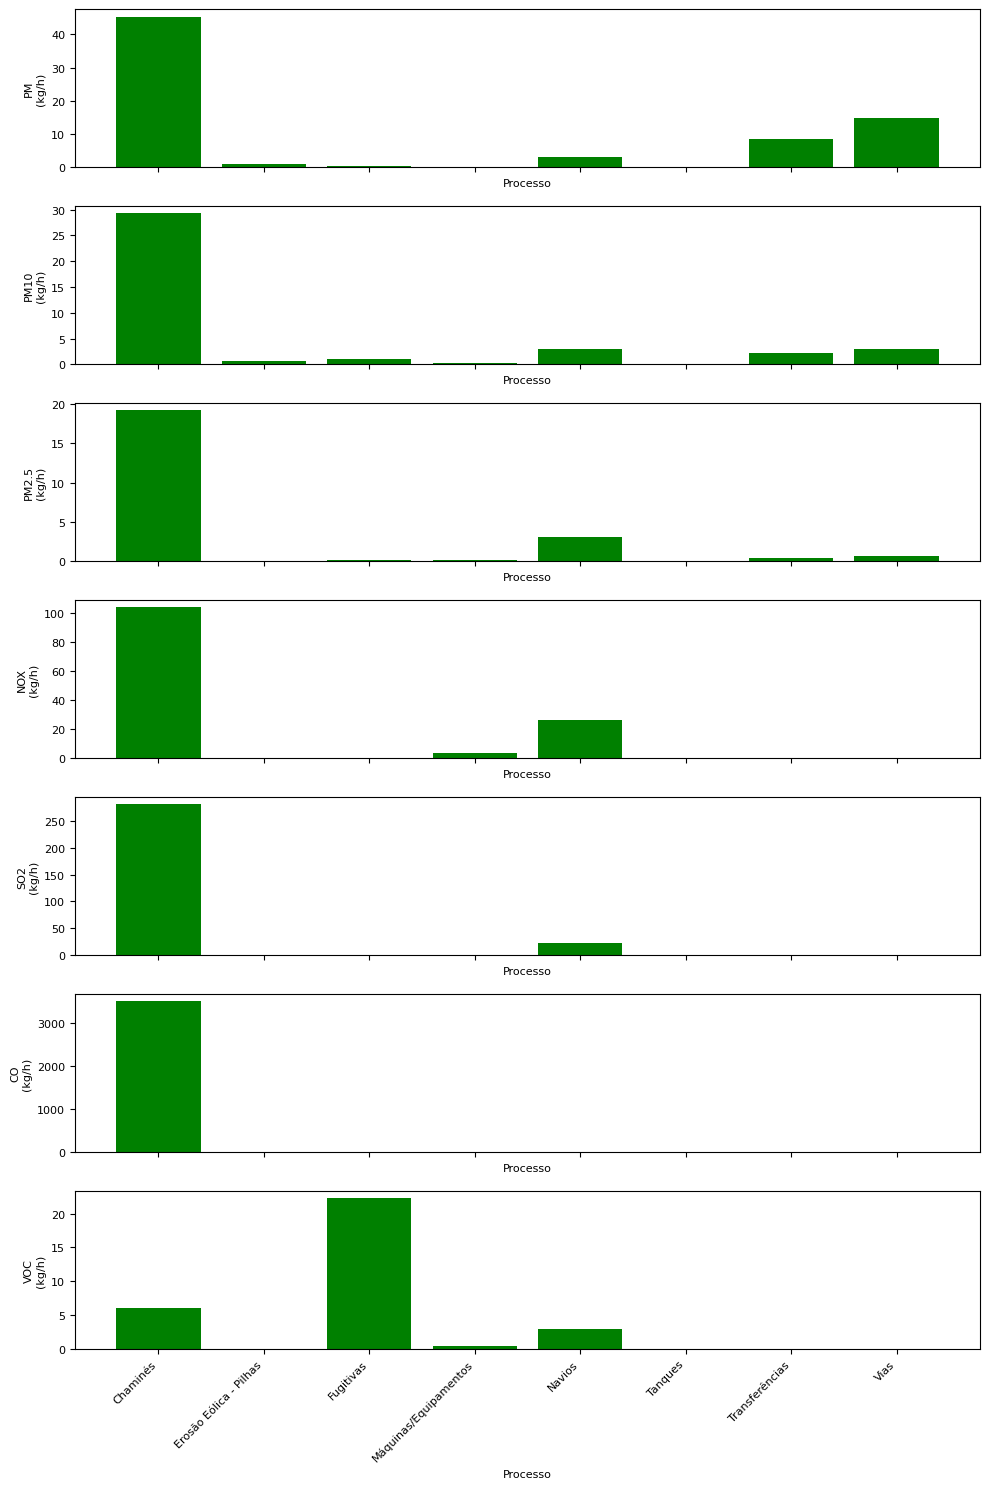

In [209]:
import matplotlib.pyplot as plt
import pandas as pd

# Definindo o DataFrame 'fe' com os dados
fe = pd.DataFrame({
    'Fonte': ['Chaminés', 'Erosão Eólica - Pilhas', 'Fugitivas', 'Máquinas/Equipamentos', 'Navios', 'Tanques', 'Transferências', 'Vias'],
    'PM': [45.34, 1.15, 0.44, 0.19, 3.04, None, 8.54, 14.96],
    'PM10': [29.25, 0.57, 1.04, 0.19, 3.04, None, 2.25, 2.99],
    'PM2.5': [19.17, 0.09, 0.18, 0.19, 3.04, None, 0.37, 0.68],
    'NOX': [104.09, None, 0.04, 3.98, 26.73, None, None, 0.36],
    'SO2': [280.37, None, 1.01, 0.01, 23.3, None, None, 0.01],
    'CO': [3506.15, None, 0.55, 1.4, 3.11, None, None, 0.12],
    'VOC': [6.12, None, 22.25, 0.45, 2.91, 0.01, None, 0.06]
})

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
fig, ax = plt.subplots(len(fe.columns) - 1, 1, sharex=True, figsize=(10, 15)) # sharex significa compartilhar o eixo x

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)): # a primeira coluna é a identificação da fonte
    ax[ii-1].bar(fe['Fonte'], fe.iloc[:,ii], color='green')
    ax[ii-1].set_xlabel('Processo', fontsize=8) # coloca o eixo x
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/h)', fontsize=8)

    ax[ii-1].tick_params(axis='x', labelsize=8)
    ax[ii-1].tick_params(axis='y', labelsize=8)

    ax[ii-1].set_xticks(fe.index)
    ax[ii-1].set_xticklabels(fe['Fonte'], rotation=45, ha='right', fontsize=8)

plt.tight_layout()  # ajusta o layout para evitar sobreposição de texto
plt.show()

In [181]:
#Taxa esta determinada em kg/h
import numpy as np
import pandas as pd

def criar_variabilidade_taxa_atividade(sazonalidade, amplitude, desvio_padrao_ruido, tamanho_amostra):
    # Criar sazonalidade mensal baseada nos dados de 2023
    sazonalidade_mensal = [0.9, 0.85, 0.95, 1.1, 1.2, 1.25, 1.3, 1.35, 1.4, 1.35, 1.2, 1.1]

    # Replicar a sazonalidade para o tamanho da amostra
    sazonalidade_amostra = np.tile(sazonalidade_mensal, tamanho_amostra // 12 + 1)[:tamanho_amostra]

    # Gerar ruído aleatório : ruído aleatório é um dos três componentes principais, juntamente com a deriva e a variação espacialmente correlacionada, que contribuem para a alteração no valor de uma variável sobre uma superfície
    ruido_aleatorio = np.random.normal(scale=desvio_padrao_ruido, size=tamanho_amostra)

    # Multiplicar a sazonalidade pelo fator de amplitude e adicionar o ruído aleatório
    taxa_atividade = sazonalidade_amostra * amplitude + ruido_aleatorio

    return taxa_atividade

# Exemplo de uso da função
sazonalidade = 1  # Fator de sazonalidade base
amplitude = 20  # Amplitude da variação sazonal
desvio_padrao_ruido = 5  # Desvio padrão do ruído aleatório
tamanho_amostra = 365  # Tamanho da amostra (um ano)

taxa_atividade = criar_variabilidade_taxa_atividade(sazonalidade, amplitude, desvio_padrao_ruido, tamanho_amostra)

# Criar DataFrame para visualização dos dados
datas = pd.date_range(start='2023-01-01', end='2023-12-31')
df = pd.DataFrame({'Data': datas, 'Atividade': taxa_atividade})

# Visualizar os dados
df

,Data,Atividade
0,2023-01-01,12.864525
1,2023-01-02,18.525169
2,2023-01-03,18.681392
3,2023-01-04,27.593683
4,2023-01-05,16.312114
...,...,...
360,2023-12-27,13.371353
361,2023-12-28,25.984123
362,2023-12-29,20.785023
363,2023-12-30,14.237416


In [182]:
df.iloc[:,0]


0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
360   2023-12-27
361   2023-12-28
362   2023-12-29
363   2023-12-30
364   2023-12-31
Name: Data, Length: 365, dtype: datetime64[ns]

In [183]:
import numpy as np
import pandas as pd

def criar_variabilidade_atividade():
    # Gerar datas para um ano
    datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')  # Frequência horária

df

,Data,Atividade
0,2023-01-01,12.864525
1,2023-01-02,18.525169
2,2023-01-03,18.681392
3,2023-01-04,27.593683
4,2023-01-05,16.312114
...,...,...
360,2023-12-27,13.371353
361,2023-12-28,25.984123
362,2023-12-29,20.785023
363,2023-12-30,14.237416


In [184]:

df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month
df['Dia'] = df['Data'].dt.day

df

,Data,Atividade,Ano,Mês,Dia
0,2023-01-01,12.864525,2023,1,1
1,2023-01-02,18.525169,2023,1,2
2,2023-01-03,18.681392,2023,1,3
3,2023-01-04,27.593683,2023,1,4
4,2023-01-05,16.312114,2023,1,5
...,...,...,...,...,...
360,2023-12-27,13.371353,2023,12,27
361,2023-12-28,25.984123,2023,12,28
362,2023-12-29,20.785023,2023,12,29
363,2023-12-30,14.237416,2023,12,30


(365,)


<Axes: >

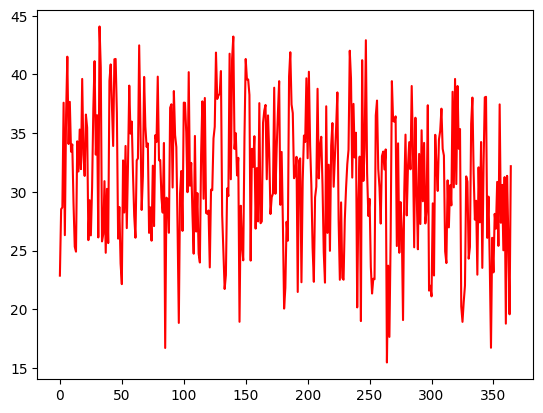

In [185]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360/1)))
df['timeSeries'] = 10*df['sazonal']+df['Atividade']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [186]:
df

,Data,Atividade,Ano,Mês,Dia,sazonal,timeSeries
0,2023-01-01,12.864525,2023,1,1,1.000000,22.864525
1,2023-01-02,18.525169,2023,1,2,0.999996,28.525130
2,2023-01-03,18.681392,2023,1,3,0.999985,28.681237
3,2023-01-04,27.593683,2023,1,4,0.999965,37.593336
4,2023-01-05,16.312114,2023,1,5,0.999938,26.311497
...,...,...,...,...,...,...,...
360,2023-12-27,13.371353,2023,12,27,0.540302,18.774376
361,2023-12-28,25.984123,2023,12,28,0.537963,31.363751
362,2023-12-29,20.785023,2023,12,29,0.535619,26.141215
363,2023-12-30,14.237416,2023,12,30,0.533271,19.570130
